In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df=pd.read_csv('https://raw.githubusercontent.com/OSkrk/Electric-vehicles-EV-Database/main/Data/EVs_data_base.csv')
#df.to_csv('EVs_data_base.csv')
df=pd.read_csv('EVs_data_base.csv')
df.reset_index(inplace=True)
print(df.head())



   index  Unnamed: 0            Car model Autonomy_WLTP_Km  \
0      0           0  Aston Martin RapidE              320   
1      1           1        Audi E tron s              362   
2      2           2              Audi Q6              500   
3      3           3               BMW i3              130   
4      4           4           BMW i3 2.0              140   

                    DC Charging connector DC charging protocol  \
0  G High Charging Combo CCS up to 150 KW   DC ISO IEC 15118-2   
1  G High Charging Combo CCS up to 150 KW   DC ISO IEC 15118-2   
2  G High Charging Combo CCS up to 150 KW            DIN 70121   
3   E Fast Charging Combo CCS up to 50 KW            DIN 70121   
4   E Fast Charging Combo CCS up to 50 KW            DIN 70121   

   DC_nominal_charge_power_KW  year    AC Charging connector  \
0                       150.0  2019                     None   
1                       150.0  2020  B Type 2 Tri up to 11KW   
2                       150.0  2018   

0


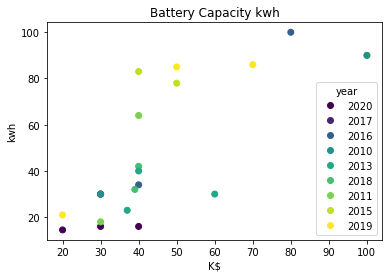

The higher priced evs have more battery capacity


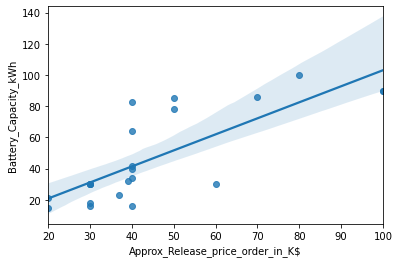

In [5]:
print(df['Battery_Capacity_kWh'].isnull().sum())
df['Battery_Capacity_kWh'].replace('empty',np.nan,inplace=True)
df.dropna(subset=['Battery_Capacity_kWh'],inplace=True)
#rint(df.head())
df['Battery_Capacity_kWh']=df['Battery_Capacity_kWh'].astype('float')

df['Approx_Release_price_order_in_K$'].replace('empty',np.nan,inplace=True)
df.dropna(subset=['Approx_Release_price_order_in_K$'],inplace=True)
df['Approx_Release_price_order_in_K$']=df['Approx_Release_price_order_in_K$'].astype('float')

legend=[str(year) for year in df['year'].unique()]
plt.title('Battery Capacity kwh')
result=plt.scatter('Approx_Release_price_order_in_K$','Battery_Capacity_kWh',data=df,c='year',label='Class 1')
plt.ylabel('kwh')
plt.xlabel('K$')
#plt.legend(legend)
plt.legend(handles=result.legend_elements()[0], 
           labels=legend,
           title="year",
          loc='lower right')
plt.show()
sns.regplot(x='Approx_Release_price_order_in_K$',y='Battery_Capacity_kWh',data=df)

print('The higher priced evs have more battery capacity')


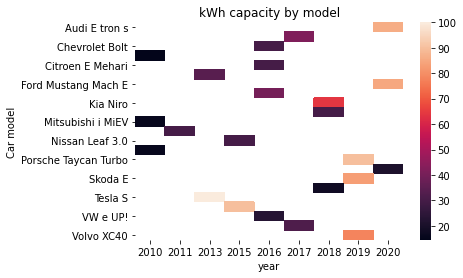

Tesla has the best battery capacity


In [6]:
fp=df.pivot_table(index='Car model',columns='year',values='Battery_Capacity_kWh',aggfunc=np.mean)
sns.heatmap(fp)
plt.title('kWh capacity by model')
plt.show()
print('Tesla has the best battery capacity')